In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

25000

In [ ]:
len(test_data)

25000

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
#Максимальный индекс слова
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# Пример декодирования отзыва по словарю
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 3.4.2. Подготовка данных
Нельзя передать списки целых чисел непосредственно в нейронную сеть. Поэтому
мы должны преобразовать их в тензоры. Сделать это можно двумя способами:

 Привести все списки к одинаковой длине, преобразовать их в тензоры целых
чисел с формой (образцы, индексы_слов) и затем передать их в первый слой
сети, способный обрабатывать такие целочисленные тензоры (слой Embedding,
о котором подробнее мы поговорим далее в этой книге).

 Выполнить прямое кодирование списков в векторы нулей и единиц. Это может
означать, например, преобразование последовательности [3, 5] в 10 000-мерный
вектор, все элементы которого содержат нули, кроме элементов с индексами
3 и 5, которые содержат единицы. Затем их можно передать в первый слой сети типа Dense, способный обрабатывать векторизованные данные с вещественными
числами

Мы пойдем по второму пути, с векторизованными данными, которые создадим
вручную, чтобы было понятнее.

In [ ]:
# Кодирование последовательностей целых чисел в бинарную матрицу
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print(list(enumerate(train_data[0:2])))

[(0, [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]), (1, [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 43

In [ ]:
print(train_data)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
# Данные представлены строкой, надо преобразовать в массив (вектор)
print(train_labels)

[1 0 0 ... 0 1 0]


In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3.4.3. Конструирование сети

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = optimizers.RMSprop(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Выделим из обучающей выборки валидационную для контроля обучения
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5248 - accuracy: 0.7811 - val_loss: 0.3972 - val_accuracy: 0.8705
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3187 - accuracy: 0.8977 - val_loss: 0.3081 - val_accuracy: 0.8894
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2293 - accuracy: 0.9286 - val_loss: 0.2785 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1815 - accuracy: 0.9417 - val_loss: 0.3078 - val_accuracy: 0.8768
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1450 - accuracy: 0.9546 - val_loss: 0.3364 - val_accuracy: 0.8665
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1206 - accuracy: 0.9637 - val_loss: 0.2861 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1002 - accuracy: 0.9695 - val_loss: 0.3272 - val_accuracy: 0.8810
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Визуализация графиков потерь и точности

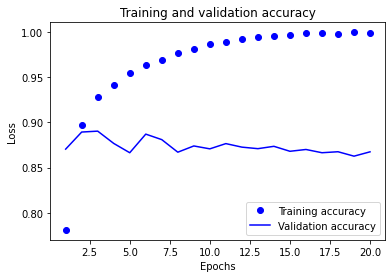

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) +1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/5
30/30 [==============================] - 2s 50ms/step - loss: 0.5241 - accuracy: 0.7919 - val_loss: 0.3698 - val_accuracy: 0.8696
Epoch 2/5
30/30 [==============================] - 1s 34ms/step - loss: 0.2766 - accuracy: 0.9081 - val_loss: 0.2896 - val_accuracy: 0.8870
Epoch 3/5
30/30 [==============================] - 1s 34ms/step - loss: 0.1901 - accuracy: 0.9389 - val_loss: 0.2780 - val_accuracy: 0.8869
Epoch 4/5
30/30 [==============================] - 1s 35ms/step - loss: 0.1422 - accuracy: 0.9567 - val_loss: 0.2851 - val_accuracy: 0.8849
Epoch 5/5
30/30 [==============================] - 1s 33ms/step - loss: 0.1089 - accuracy: 0.9695 - val_loss: 0.3024 - val_accuracy: 0.8829


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3280 - accuracy: 0.8730


In [ ]:
results

[0.32798218727111816, 0.8729599714279175]

In [ ]:
model.predict(x_test)

array([[0.13861185],
       [0.9994849 ],
       [0.9081724 ],
       ...,
       [0.0393621 ],
       [0.0568403 ],
       [0.4229781 ]], dtype=float32)

# Эксперименты с сетью

## 1 скрытый слой

In [ ]:
# 1 слой
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3541 - accuracy: 0.8545 - val_loss: 0.2820 - val_accuracy: 0.8879
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1793 - accuracy: 0.9358 - val_loss: 0.2958 - val_accuracy: 0.8817
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1203 - accuracy: 0.9579 - val_loss: 0.3345 - val_accuracy: 0.8763
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0789 - accuracy: 0.9761 - val_loss: 0.3846 - val_accuracy: 0.8753
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0523 - accuracy: 0.9865 - val_loss: 0.4384 - val_accuracy: 0.8719
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0348 - accuracy: 0.9922 - val_loss: 0.5203 - val_accuracy: 0.8686
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0208 - accuracy: 0.9975 - val_loss: 0.5651 - val_accuracy: 0.8652
Epoch 

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 1.1578 - accuracy: 0.8494


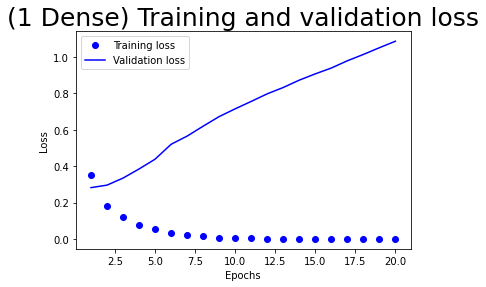

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('(1 Dense) Training and validation loss', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

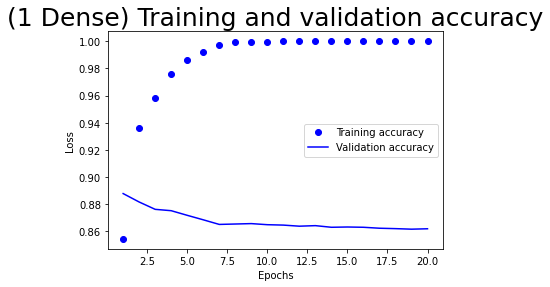

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) +1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('(1 Dense) Training and validation accuracy', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 3 слоя

In [ ]:
# 3 слоя
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 3s 10ms/step - loss: 0.4080 - accuracy: 0.8089 - val_loss: 0.2874 - val_accuracy: 0.8836
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1761 - accuracy: 0.9361 - val_loss: 0.3175 - val_accuracy: 0.8770
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0980 - accuracy: 0.9661 - val_loss: 0.3860 - val_accuracy: 0.8732
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0555 - accuracy: 0.9811 - val_loss: 0.4975 - val_accuracy: 0.8707
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.5917 - val_accuracy: 0.8660
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.7015 - val_accuracy: 0.8675
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.7436 - val_accuracy: 0.8630
Epo

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 1.3980 - accuracy: 0.8472


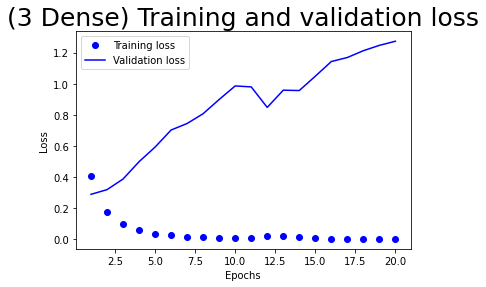

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('(3 Dense) Training and validation loss', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

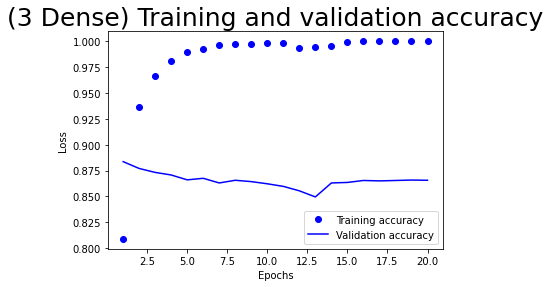

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) +1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('(3 Dense) Training and validation accuracy', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 32 нейрона

In [ ]:
# 3 слоя
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 5s 13ms/step - loss: 0.3599 - accuracy: 0.8463 - val_loss: 0.2865 - val_accuracy: 0.8806
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1651 - accuracy: 0.9378 - val_loss: 0.3171 - val_accuracy: 0.8792
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0966 - accuracy: 0.9657 - val_loss: 0.3778 - val_accuracy: 0.8709
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0522 - accuracy: 0.9825 - val_loss: 0.5080 - val_accuracy: 0.8560
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0251 - accuracy: 0.9927 - val_loss: 0.6252 - val_accuracy: 0.8656
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0089 - accuracy: 0.9981 - val_loss: 0.7185 - val_accuracy: 0.8642
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.8051 - val_accuracy: 0.8649

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 1.2285 - accuracy: 0.8537


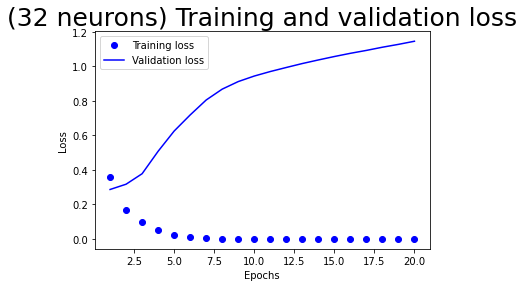

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('(32 neurons) Training and validation loss', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

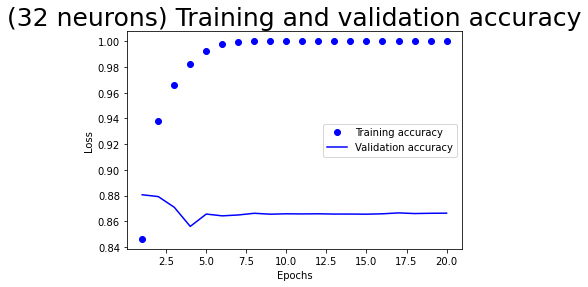

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) +1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('(32 neurons) Training and validation accuracy', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 64 нейрона

In [ ]:
# 3 слоя
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 4s 16ms/step - loss: 0.3508 - accuracy: 0.8457 - val_loss: 0.2823 - val_accuracy: 0.8864
Epoch 2/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1502 - accuracy: 0.9437 - val_loss: 0.3379 - val_accuracy: 0.8741
Epoch 3/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0675 - accuracy: 0.9759 - val_loss: 0.4164 - val_accuracy: 0.8709
Epoch 4/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0228 - accuracy: 0.9938 - val_loss: 0.5687 - val_accuracy: 0.8735
Epoch 5/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 0.6851 - val_accuracy: 0.8737
Epoch 6/20
235/235 [==============================] - 3s 13ms/step - loss: 9.1681e-04 - accuracy: 0.9999 - val_loss: 0.7667 - val_accuracy: 0.8736
Epoch 7/20
235/235 [==============================] - 3s 13ms/step - loss: 3.6503e-04 - accuracy: 1.0000 - val_loss: 0.8202 - val_accuracy

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 1.2464 - accuracy: 0.8597


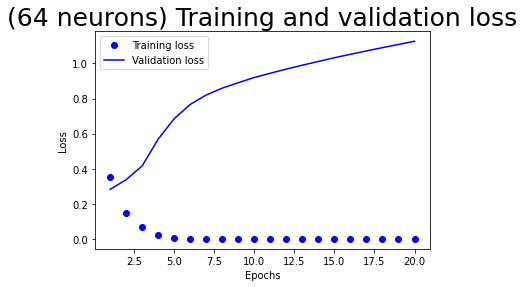

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('(64 neurons) Training and validation loss', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

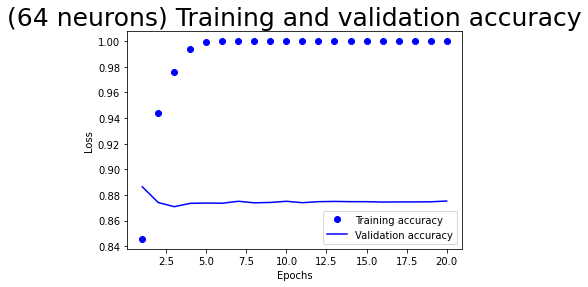

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) +1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('(64 neurons) Training and validation accuracy', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Функция активации tanh

In [ ]:
# 3 слоя
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 3s 10ms/step - loss: 0.3482 - accuracy: 0.8515 - val_loss: 0.2758 - val_accuracy: 0.8851
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1704 - accuracy: 0.9371 - val_loss: 0.3040 - val_accuracy: 0.8800
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1111 - accuracy: 0.9607 - val_loss: 0.3495 - val_accuracy: 0.8745
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0793 - accuracy: 0.9720 - val_loss: 0.4287 - val_accuracy: 0.8732
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0458 - accuracy: 0.9859 - val_loss: 0.5427 - val_accuracy: 0.8602
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.5970 - val_accuracy: 0.8649
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.6917 - val_accuracy: 0.8592
Ep

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 1.2464 - accuracy: 0.8597


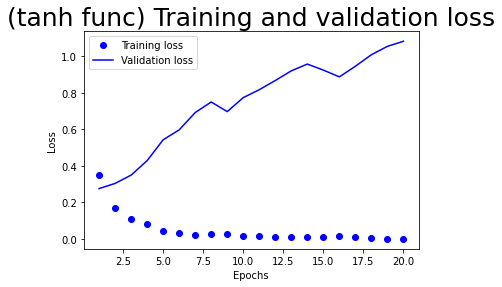

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('(tanh func) Training and validation loss', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

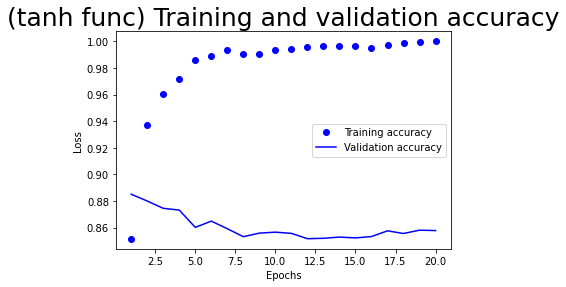

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) +1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('(tanh func) Training and validation accuracy', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## MSE loss

In [ ]:
# 3 слоя
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1216 - accuracy: 0.8497 - val_loss: 0.0841 - val_accuracy: 0.8881
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0537 - accuracy: 0.9334 - val_loss: 0.0863 - val_accuracy: 0.8803
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0341 - accuracy: 0.9615 - val_loss: 0.0921 - val_accuracy: 0.8773
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0236 - accuracy: 0.9745 - val_loss: 0.0976 - val_accuracy: 0.8741
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0157 - accuracy: 0.9848 - val_loss: 0.1012 - val_accuracy: 0.8735
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0110 - accuracy: 0.9903 - val_loss: 0.1081 - val_accuracy: 0.8657
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0088 - accuracy: 0.9917 - val_loss: 0.1091 - val_accuracy: 0.8688
Epoch

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 1.2464 - accuracy: 0.8597


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

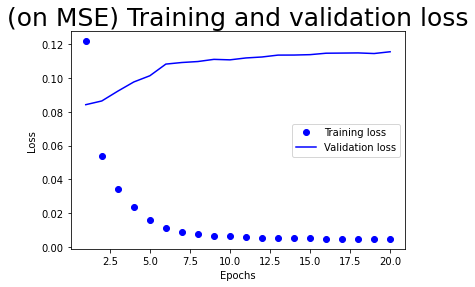

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('(on MSE) Training and validation loss', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

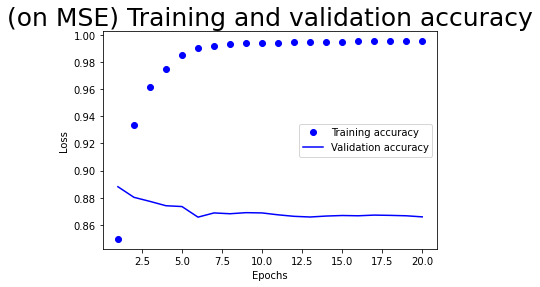

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) +1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('(on MSE) Training and validation accuracy', fontsize=25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()